# Complete Data Analysis

This Jupyter Notebook is used to analyze either the collected data or the generated data to identify how balanced the dataset is

#### Handling Imports

In [21]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#### Reading Data in
The following code reads in all data neccesary as well as sets constants as neccesary

In [22]:
df = pd.read_csv('deviceSummary.csv') 
columns = list(df.columns)
print(df)
trialCol, TempCol, SpeedCol, DistCol, PresCol = 0, 1, 2, 3, 4
numBins = 4

     devices  Temperature  Speed  Distance  Pressure  Efficiency
0          1           70    100         7         0        1.34
1          2           70    100         7         0        1.80
2          3           70    100         7         0        1.86
3          4           70    100         7         0        1.58
4          5           70    100         7         0        1.01
..       ...          ...    ...       ...       ...         ...
101      102           70    150         8         0        1.36
102      103           70    150         8         0        3.23
103      104           70    150         8         0        1.13
104      105           70    150         8         0        1.04
105      106           70    150         8         0        1.37

[106 rows x 6 columns]


#### Graphing Temperature Distribution

Temperature


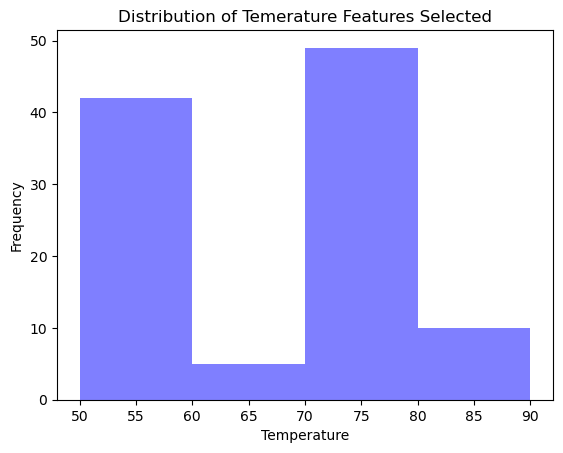

In [23]:
print(columns[TempCol])
plt.hist(df[columns[TempCol]], numBins, facecolor='blue', alpha=0.5)
plt.title("Distribution of Temerature Features Selected")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

#### Graphing Speed Distribution

Speed


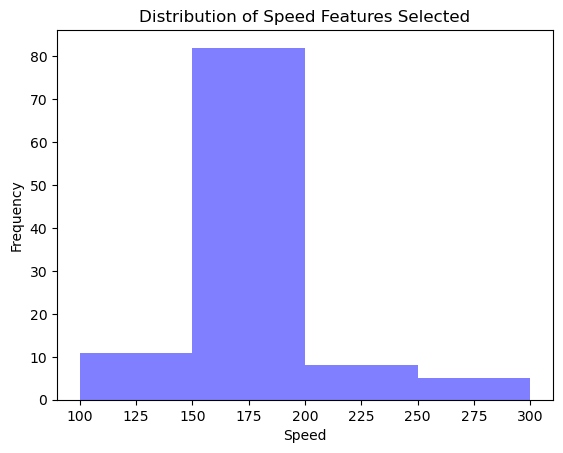

In [24]:
print(columns[SpeedCol])
plt.hist(df[columns[SpeedCol]], numBins, facecolor='blue', alpha=0.5)
plt.title("Distribution of Speed Features Selected")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.show()

#### Graphing Distance Distribution

Distance


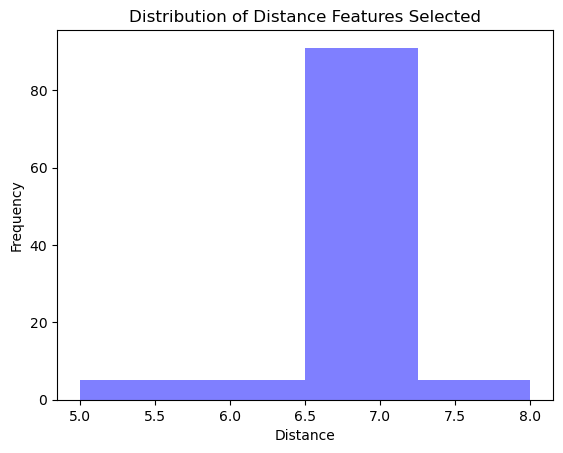

In [25]:
print(columns[DistCol])
plt.hist(df[columns[DistCol]], numBins, facecolor='blue', alpha=0.5)
plt.title("Distribution of Distance Features Selected")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

#### Graphing Pressure Distribution

Pressure


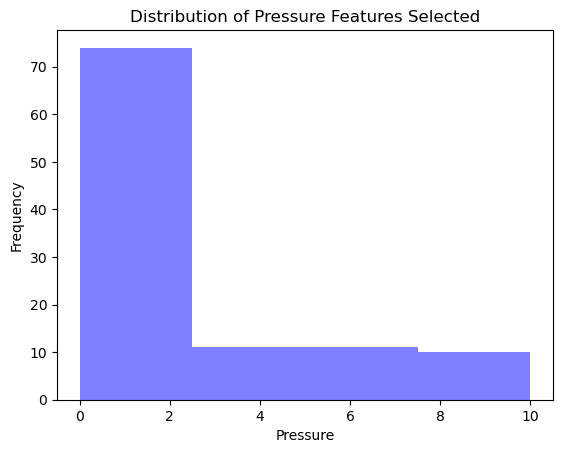

In [26]:
print(columns[PresCol])
plt.hist(df[columns[PresCol]], numBins, facecolor='blue', alpha=0.5)
plt.title("Distribution of Pressure Features Selected")
plt.xlabel("Pressure")
plt.ylabel("Frequency")
plt.show()


             Temperature     Speed  Distance  Pressure  Efficiency
Temperature     1.000000  0.109623 -0.107059 -0.646521   -0.707694
Speed           0.109623  1.000000  0.033245 -0.107657   -0.185591
Distance       -0.107059  0.033245  1.000000  0.105139    0.031981
Pressure       -0.646521 -0.107657  0.105139  1.000000    0.494529
Efficiency     -0.707694 -0.185591  0.031981  0.494529    1.000000


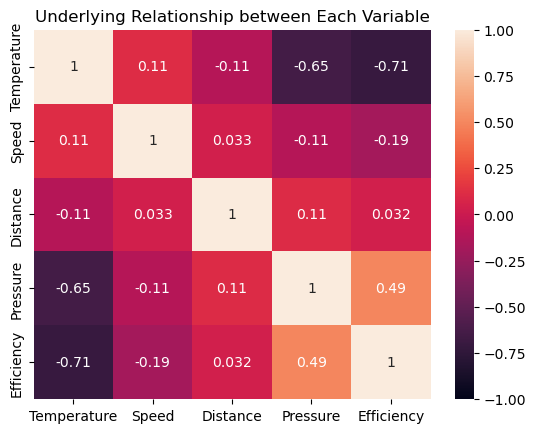

In [27]:
columns.remove('devices')
col_list = columns
dataset = pd.read_csv('deviceSummary.csv', usecols=col_list)
corrMatrix = dataset.corr()
print(corrMatrix)
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True, vmin=-1)
plt.title("Underlying Relationship between Each Variable")
plt.show()

     Temperature  Speed  Distance  Pressure  Efficiency
0            0.5   0.00  0.666667       0.0    0.081897
1            0.5   0.00  0.666667       0.0    0.131466
2            0.5   0.00  0.666667       0.0    0.137931
3            0.5   0.00  0.666667       0.0    0.107759
4            0.5   0.00  0.666667       0.0    0.046336
..           ...    ...       ...       ...         ...
101          0.5   0.25  1.000000       0.0    0.084052
102          0.5   0.25  1.000000       0.0    0.285560
103          0.5   0.25  1.000000       0.0    0.059267
104          0.5   0.25  1.000000       0.0    0.049569
105          0.5   0.25  1.000000       0.0    0.085129

[106 rows x 5 columns]
             Temperature     Speed  Distance  Pressure  Efficiency
Temperature     0.087107  0.006025 -0.005541 -0.065094   -0.059765
Speed           0.006025  0.034682  0.001086 -0.006840   -0.009890
Distance       -0.005541  0.001086  0.030748  0.006289    0.001605
Pressure       -0.065094 -0.006840  

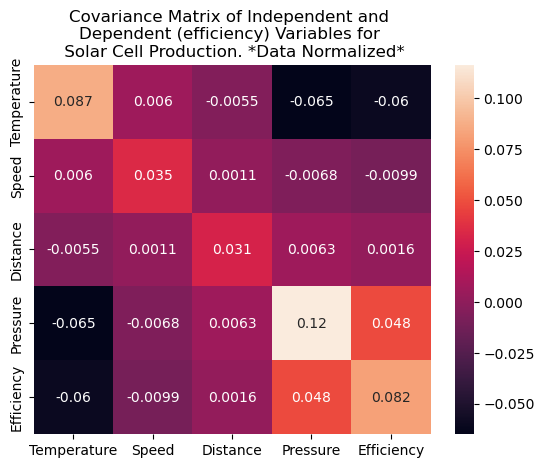

In [28]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


dataset = pd.read_csv('deviceSummary.csv')[list(df.columns)[1:]]
normalizedDataset = normalize(dataset)
print(normalizedDataset)
covMatrix = pd.DataFrame.cov(normalizedDataset)
print(covMatrix)
sn.heatmap(covMatrix, annot=True)
plt.title("Covariance Matrix of Independent and \nDependent (efficiency) Variables for \n Solar Cell Production. *Data Normalized*")
plt.show()